# Inargural Project 2023

Indholdsfortegnelse


Imports and set magics

In [20]:
%load_ext autoreload
%autoreload 2
import HouseholdSpecializationModel as HSM

import pandas as pd
from scipy import optimize
import numpy as np

%matplotlib inline
# %matplotlib qt
from matplotlib import pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

from IPython import display



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# load class
model = HSM.HouseholdSpecializationModelClass()

## Question 1

for alpha = 0.25 and sigma = 0.5, HF/HM = 0.5454545454545454
for alpha = 0.25 and sigma = 1.0, HF/HM = 0.3076923076923077
for alpha = 0.25 and sigma = 1.5, HF/HM = 0.21428571428571427
for alpha = 0.5 and sigma = 0.5, HF/HM = 1.0
for alpha = 0.5 and sigma = 1.0, HF/HM = 1.0
for alpha = 0.5 and sigma = 1.5, HF/HM = 1.0
for alpha = 0.75 and sigma = 0.5, HF/HM = 1.8333333333333333
for alpha = 0.75 and sigma = 1.0, HF/HM = 3.25
for alpha = 0.75 and sigma = 1.5, HF/HM = 4.666666666666667


Text(0.5, 1.0, '$H_F/H_M$ for varying alpha and sigma values')

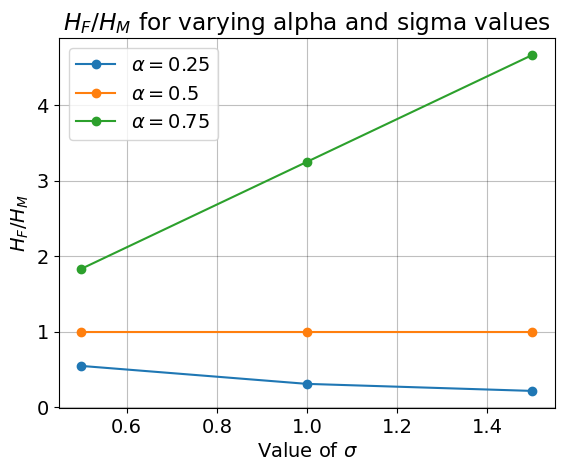

In [22]:

# List of parameters
alpha_list = [0.25,0.5,0.75]
sigma_list = [0.5,1.0,1.5]

# Create empty list for solutions
solution_list = []

# For loop to solve problem for list of parameters
for alpha in alpha_list:
    model.par.alpha = alpha
    for sigma in sigma_list:
        model.par.sigma = sigma
    
        # Solve for given alpha and sigma
        solution = model.solve_discrete()

        # Unpack solution
        HF = solution.HF
        HM = solution.HM
        solution_list.append(HF/HM)

        # Print results
        print(f'for alpha = {alpha} and sigma = {sigma}, HF/HM = {HF/HM}')

# Split solutions by value of alpha
alpha_025 = solution_list[0:3]
alpha_05 = solution_list[3:6]
alpha_075 = solution_list[6:9]

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sigma_list,alpha_025, label = '$α = 0.25$',marker ='o')
ax.plot(sigma_list, alpha_05, label = '$ α= 0.5$', marker = 'o')
ax.plot(sigma_list, alpha_075, label = '$α = 0.75$', marker = 'o') 
ax.set_xlabel('Value of $\sigma$')
ax.set_ylabel('$H_F/H_M$')
ax.legend(loc='upper left')
ax.set_title("$H_F/H_M$ for varying alpha and sigma values")

## Question 2

/Users/konradthide/Desktop/01.06_IntroProg/assignments/projects-2023-scb/inauguralproject/HouseholdSpecializationModel.py:96: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho) # RuntimeWarning: invalid value encountered in reciprocal


start solve_wF_vec()
wf_vec = [0.8 0.9 1.  1.1 1.2]
LM_vec = [6.  5.  4.5 4.  3. ]
HM_vec = [4.  4.5 4.5 4.5 5. ]
LF_vec = [3.  4.  4.5 5.  5.5]
HF_vec = [5.  4.5 4.5 4.  4. ]
end solve_wF_vec()

 The baseline parameters in the model is: 
1. Preferences           = (rho, epsilon, omega, nu) = (2.00, 1.00, 0.50, 0.001) 
2. Household production  = (alpha, sigma )           = (0.50, 1.00) 
3. Wages                 = (wM,wF)                   = (1.00, 1.00) 



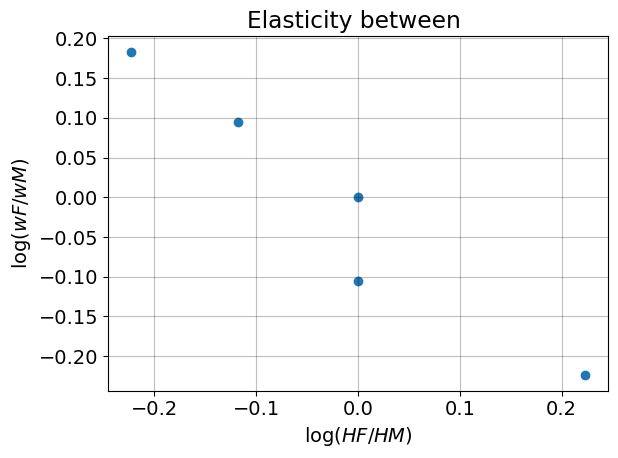

In [25]:
# a. solve discrete
model = HSM.HouseholdSpecializationModelClass()
solution = model.solve_wF_vec(discrete = True, do_print=True)

# b.  extract solution
HF_vec = solution.HF_vec
HM_vec = solution.HM_vec
wF_vec = model.par.wF_vec

# c. transform data for plot 
log_HFM = np.log(HF_vec/HM_vec)
log_wFM = np.log(wF_vec)  # note that wM = 1, so wF_vec/wM = wF_vec

# d. create figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(log_HFM,log_wFM)
ax.set_title('Elasticity between ')
ax.set_xlabel('$\log(HF/HM)$')
ax.set_ylabel("$\log(wF/wM)$")
fig.tight_layout()

## Question 3

start solve_wF_vec()
wf_vec = [0.8 0.9 1.  1.1 1.2]
LM_vec = [5.88926508 5.16759721 4.45449157 3.76196967 3.08968621]
HM_vec = [4.09256684 4.27109629 4.45449155 4.63947483 4.83264873]
LF_vec = [2.86973981 3.7493099  4.45449157 5.02416695 5.47961068]
HF_vec = [5.11571312 4.74568063 4.45449158 4.21803166 4.02720497]
end solve_wF_vec()


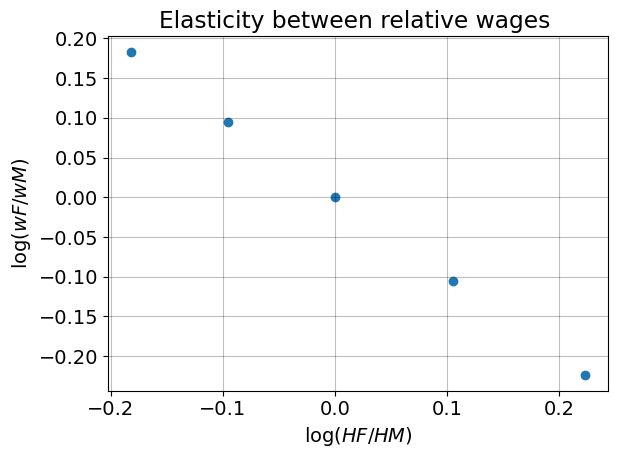

In [26]:
# a. solve continously
model = HSM.HouseholdSpecializationModelClass()
solution = model.solve_wF_vec(discrete = False, do_print=True)

# b. extract solutions
HF_vec = solution.HF_vec
HM_vec = solution.HM_vec
wF_vec = model.par.wF_vec

# c. transform data for plotting
log_HFM = np.log(HF_vec/HM_vec)
log_wFM = np.log(wF_vec)  # note that wM = 1, so wF_vec/wM = wF_vec

# d. create figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(log_HFM,log_wFM)
ax.set_title('Elasticity between relative wages ')
ax.set_xlabel('$\log(HF/HM)$')
ax.set_ylabel('$\log(wF/wM)$')
fig.tight_layout()

## Question 4

In [ ]:
# code for solving the model (remember documentation and comments)

We estimate $\sigma$ and $\alpha$ such that the error function $(\beta_{0}-\hat \beta_0)^2+(\beta_1-\hat \beta_1)^2$ is minimized, where we assume that $\beta_0=0.4$ and $\beta_1 \approx -0.1$.

First we plot the error function for discrete values of $\alpha$ and $\sigma$ and secondly we minimize the loss function using the scipy module.


#### required packages, modules, Jupyter magic and functions for quesiton 4:


In [ ]:
%load_ext autoreload
%autoreload 2
from HSM_model_copy import HouseholdSpecializationModelClass
import numpy as np
import pandas as pd
from tqdm import tqdm
%matplotlib inline
%matplotlib qt
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.interpolate import griddata
import os

if str(os.getcwd())[-34:] == 'projects-2023-scb/inauguralproject':
    print("You're good to go")
else:
    print("your in the wrong working directory, make sure you're running the script from a folder containing all the files needed to run the script")

**4.1 plots**

Plotting the errors for different values of $\sigma$ and $\alpha$ restricting the values of the error function gradually, suggests that the estimates that reduce the loss function lies in a neighbourhood of $\alpha$ close to 1 and $\sigma$ close to zero.

In [ ]:
model = HouseholdSpecializationModelClass()
results = {}
for i in ['alpha', 'sigma', 'error']:
      results[i] = []

for model.par.alpha in tqdm(np.linspace(0,1, 100)):
    for model.par.sigma in np.linspace(0, 100, 100):
            sol = model.solve_wF_vec()
            model.run_regression()
            #beta0hat = model.sol.beta0
            #beta1hat = model.sol.beta1
            error = model.error_function()
            results['alpha'].append(model.par.alpha)
            results['sigma'].append(model.par.sigma)
            results['error'].append(error) 

model.par.alpha = 0.5
model.par.sigma = 1


**Save the results from the loop to avoid running the loop over and over again**

In [ ]:
# save results
results = pd.DataFrame(results)
results.sort_values(by='error')
results.to_pickle(os.path.join('output_from_loops','resultsbigloop.pkl'))


In [ ]:
# reload results
results = pd.read_pickle(os.path.join('output_from_loops','resultsbigloop.pkl'))
results.head()

**Plots the error function for different error tolerances**

In [ ]:
error_cutoff = [10, 20, 100, 300, 400, 500]
for i in error_cutoff:
    df = results[results['error']<i]
    fig = plt.figure(constrained_layout=True)
    ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
    x = df['alpha']
    y = df['sigma']
    z = df['error']
    x1 = np.linspace(df['alpha'].min(), df['alpha'].max(), len(df['alpha'].unique()))
    y1 = np.linspace(df['sigma'].min(), df['sigma'].max(), len(df['sigma'].unique()))
    x2, y2 = np.meshgrid(x1, y1)
    ax.set_xlabel('alpha')
    ax.set_ylabel('sigma')
    ax.set_zlabel('error')
    ax.set_title(f'error restricted to less than {i}')
    z2 = griddata((df['alpha'], df['sigma']), df['error'], (x2, y2), method='nearest')
    ax.plot_surface(x2,y2, z2, cmap='coolwarm', rstride=1, cstride=1);

The above figures suggest that $\sigma$ should be at least less than 3. Plotting the eror function for $\sigma \in (0,3)$ can help set some starting values for the optimization problem.

In [ ]:
results_sigma_low = {}
for i in ['alpha', 'sigma', 'error']:
      results_sigma_low[i] = []

for model.par.alpha in tqdm(np.linspace(0,1, 50)):
    for model.par.sigma in np.linspace(0, 3, 50):
            sol = model.solve_wF_vec()
            model.run_regression()
            #beta0hat = model.sol.beta0
            #beta1hat = model.sol.beta1
            error = model.error_function()
            results_sigma_low['alpha'].append(model.par.alpha)
            results_sigma_low['sigma'].append(model.par.sigma)
            results_sigma_low['error'].append(error) 

model.par.alpha = 0.5
model.par.sigma = 1

results_sigma_low = pd.DataFrame(results_sigma_low)
results_sigma_low.to_pickle(os.path.join('output_from_loops','results_sigma_low.pkl'))

In [ ]:
results_sigma_low = pd.read_pickle(os.path.join('output_from_loops', 'results_sigma_low.pkl'))
# plots the error function for different 
for i in [0.1, 1, 2]:
    df = results_sigma_low[results_sigma_low['error']<i]
    fig = plt.figure(constrained_layout=True)
    ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
    x = df['alpha']
    y = df['sigma']
    z = df['error']
    x1 = np.linspace(df['alpha'].min(), df['alpha'].max(), len(df['alpha'].unique()))
    y1 = np.linspace(df['sigma'].min(), df['sigma'].max(), len(df['sigma'].unique()))
    x2, y2 = np.meshgrid(x1, y1)
    ax.set_xlabel('alpha')
    ax.set_ylabel('sigma')
    ax.set_zlabel('error')
    ax.set_title(f'error restricted to less than {i}')
    z2 = griddata((df['alpha'], df['sigma']), df['error'], (x2, y2), method='nearest')
    ax.plot_surface(x2,y2, z2, cmap='coolwarm', rstride=1, cstride=1);

In [ ]:
# solve for boptimal parameters usign scipy, 
model = HouseholdSpecializationModelClass()
model.par.sigma = 0.1 #set starting value for optimisation problem for sigma to 0.1
model.par.alpha = 0.51 #set starting value for optimisation problem for alpha to 0.51
error = model.estimate()
print(error)

Using the parameter $\sigma=0.1$ and $\alpha=0.9820$ we minimize the error function. These results suggests that women have to seriously more productive than men in the household if we want the momdel to fit the data.

## Question 5

In [ ]:
# code for solving the model (remember documentation and comments)